In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
# 定义神经网络中的隐藏层
def add_layer(inputs, size_inputs, size_outputs, act_fun = None):
    Weight = tf.Variable(tf.random_normal([size_inputs, size_outputs]))
    biases = tf.Variable(tf.zeros([1, size_outputs]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weight) + biases
    if act_fun == None:
        output = Wx_plus_b
    else:
        output = act_fun(Wx_plus_b)
    return output

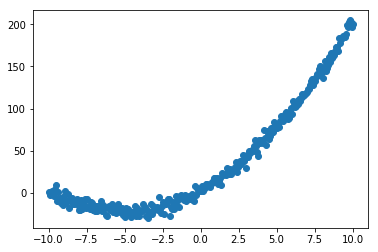

In [7]:
# 定义训练的数据

x_data = np.linspace(-10, 10, 300)[:, np.newaxis]

# 噪音，使得数据更加真实

noise = np.random.normal(0, 5, x_data.shape).astype(np.float32)

# 大体趋势：Y = X^2 + 3

y_data = np.square(x_data) +10*x_data+ 3 + noise

plt.scatter(x_data,y_data)

plt.show()

In [8]:
# 定义输入变量
xs = tf.placeholder(tf.float32, [None, 1], name = 'x_in')
ys = tf.placeholder(tf.float32, [None, 1], name = 'y_in')
# 实例化隐藏层l1，1个输入值，20个输出值，即有20个节点
l1 = add_layer(xs, 1, 20, act_fun = tf.nn.relu)
# 得到l1的输出数据，并输出最终的数据，20个输入值，1个输出值，即有1个节点

prediction = add_layer(l1, 20, 1)

 

# 定义代价函数

loss = tf.reduce_mean(tf.reduce_sum(tf.square(prediction - ys), reduction_indices=[1]))

# 定义训练方法：梯度下降；  指定学习率：0.001（一定不要太大，否则会NAN）；  训练目的：最小化loss

train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
 

# 初始化全部变量

init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

 

# 迭代20,000次

for i in range(20000):

    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})


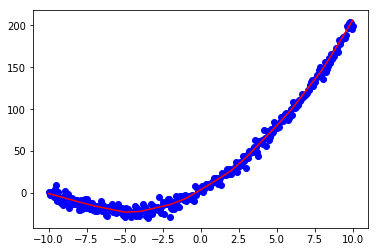

In [9]:

# 测试数据

X = np.arange(-10, 11)

# 将X转置

X = X.reshape([21, 1])

# 得到预测结果Y

Y = sess.run(prediction, feed_dict={xs: X})



# 画出源数据

plt.scatter(x_data, y_data, color = 'b')

# 画出预测直线

plt.plot(X, Y, color = 'r')

# 显示结果

plt.show()
